# Regression demo

## Profit Prediction

In [1]:
import warnings

warnings.filterwarnings(action="ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./50_Startups.csv')
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df["State"].head()

0      New York
1    California
2       Florida
3      New York
4       Florida
Name: State, dtype: object

In [9]:
df["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [10]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(df['State'])

LabelEncoder()

In [12]:
encoder.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [13]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
df['State'] = encoder.transform(df['State'])

In [15]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [17]:
df.describe()

,RnD,Administration,Marketing,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [18]:
df.corr()

,RnD,Administration,Marketing,State,Profit
RnD,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


<Axes: >

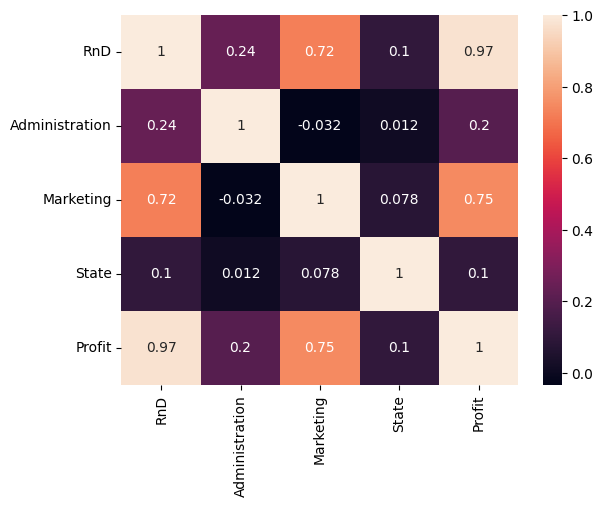

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
df.drop(['State', 'Administration'], axis=1, inplace=True)

In [23]:
df.head()

,RnD,Marketing,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [26]:
x = df.drop("Profit",axis = 1)
y = df["Profit"]

In [27]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=123456)

In [28]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)
y_pred

array([ 67937.70966841, 117410.95152743,  90887.22034848, 153956.08466113,
        75681.75322083,  98546.12399857,  50933.64799536,  99949.16875091,
       128923.97090458, 103909.74934396])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mae




7227.209022618374

In [34]:
mse = mean_squared_error(y_test,y_pred)
mse


150622642.96180212

In [35]:

rmse = root_mean_squared_error(y_test,y_pred)
rmse

12272.841682422295

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8800898063759653

In [37]:
n = len(y_test)
k = 2
adjusted_r2_score = 1 - ((1 - np.square(r2)) * ((n - 1) / (n - (k + 1))))
adjusted_r2_score

np.float64(0.7101460865117082)